In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [13]:

df = pd.read_csv('data/SICLIFE DATA.csv')
df.head()


,POLICY,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION,EXPIRY,MONTHLY,SUM,PAID PREMIUM,PREMIUM,TOTAL PREMIUM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,DATE,DATE,PLANNED,ASSURED,2024,COUNT,TO DATE
1,1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50"
2,1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80"
3,2,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00"
4,3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00"


In [14]:

# Drop the first row
df = df.drop(df.index[0])

# Drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION,EXPIRY,MONTHLY,SUM,PAID PREMIUM,PREMIUM,TOTAL PREMIUM
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50"
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80"
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00"
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00"
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,1-Feb-22,1-Feb-51,100,"2,000.00",0,0,100


In [15]:

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 1 to 620
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   POLICY NO.     615 non-null    object
 1   ASSURED        615 non-null    object
 2   GENDER         616 non-null    object
 3   OCCUP.         615 non-null    object
 4   BRANCH         615 non-null    object
 5   INST.          616 non-null    object
 6   PLAN           615 non-null    object
 7   PROPOSALS      615 non-null    object
 8   INCEPTION      615 non-null    object
 9   EXPIRY         615 non-null    object
 10  MONTHLY        615 non-null    object
 11  SUM            615 non-null    object
 12  PAID PREMIUM   615 non-null    object
 13  PREMIUM        615 non-null    object
 14  TOTAL PREMIUM  615 non-null    object
dtypes: object(15)
memory usage: 72.8+ KB


,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION,EXPIRY,MONTHLY,SUM,PAID PREMIUM,PREMIUM,TOTAL PREMIUM
count,615,615,616,615,615,616,615,615,615,615,615,615,615,615,615
unique,615,286,3,105,1,14,5,68,19,194,34,7,99,5,138
top,UKS2023T03696,EMMANUEL,FEMALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,15-Feb-24,1-Nov-23,1-Nov-46,100,"2,000.00",291,3,291
freq,1,22,332,259,615,571,313,30,160,14,194,487,88,381,47



"""* Dataset has missing data in it and thus needs further preprocessing and cleaning

* Rename the columns for better navigation
"""

In [16]:
# rename columns
df.rename(columns={'POLICY NO.': 'policy_number',
                              'ASSURED': 'policyholder',
                              'SUM': 'policy_value',
                              'GENDER': 'gender',
                              'OCCUP.': 'occupation',
                              'BRANCH': 'branch',
                              'INST.': 'inst',
                              'PLAN': 'plan',
                              'PROPOSALS': 'proposals',
                              'INCEPTION': 'inception_date',
                              'EXPIRY': 'expiry_date',
                              'MONTHLY': 'monthly_premium',
                              'TOTAL PREMIUM': 'total_premium',
                              'PREMIUM': 'premium',
                              'PAID PREMIUM': 'paid_premium',
                              'PAID PREMIUM': 'paid_premium',
                              'PREMIUM': 'premium'}, inplace=True)

df.head()


,policy_number,policyholder,gender,occupation,branch,inst,plan,proposals,inception_date,expiry_date,monthly_premium,policy_value,paid_premium,premium,total_premium
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50"
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80"
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00"
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00"
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,1-Feb-22,1-Feb-51,100,"2,000.00",0,0,100


In [17]:

def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)

check_missing_values(df)

# drop missing values
df.dropna(inplace=True)
check_missing_values(df)

Missing Values:
policy_number      5
policyholder       5
gender             4
occupation         5
branch             5
inst               4
plan               5
proposals          5
inception_date     5
expiry_date        5
monthly_premium    5
policy_value       5
paid_premium       5
premium            5
total_premium      5
dtype: int64
Missing Values:
policy_number      0
policyholder       0
gender             0
occupation         0
branch             0
inst               0
plan               0
proposals          0
inception_date     0
expiry_date        0
monthly_premium    0
policy_value       0
paid_premium       0
premium            0
total_premium      0
dtype: int64


In [18]:
df.to_csv('data/cleaned_data.csv')

In [19]:
df.columns

Index(['policy_number', 'policyholder', 'gender', 'occupation', 'branch',
       'inst', 'plan', 'proposals', 'inception_date', 'expiry_date',
       'monthly_premium', 'policy_value', 'paid_premium', 'premium',
       'total_premium'],
      dtype='object')

In [20]:
df = pd.read_csv('data/cleaned_data.csv')

In [21]:
# Convert numerical columns with commas to floats
df['policy_value'] = df['policy_value'].str.replace(',', '').astype(float)
df['total_premium'] = df['total_premium'].str.replace(',', '').astype(float)


In [24]:
# Impute numerical columns with mean
num_cols = ['monthly_premium', 'policy_value', 'paid_premium', 'premium', 'total_premium']
# Remove commas from numerical columns and convert to float
for col in num_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)

# Now apply the imputer
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [25]:
# Impute categorical columns with mode
cat_cols = ['policyholder', 'gender', 'occupation', 'branch', 'plan']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [26]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'occupation', 'branch', 'plan'], drop_first=True)


In [27]:
# Convert dates and derive additional features
df['inception_date'] = pd.to_datetime(df['inception_date'], format='%d-%b-%y')
df['expiry_date'] = pd.to_datetime(df['expiry_date'], format='%d-%b-%y')


In [28]:
# Derive policy_age and time_to_expiry
df['policy_age'] = (pd.to_datetime('today') - df['inception_date']).dt.days / 365.25
df['time_to_expiry'] = (df['expiry_date'] - pd.to_datetime('today')).dt.days / 365.25


In [29]:
# Normalize numerical variables if necessary
scaler = StandardScaler()
df[['policy_value', 'paid_premium', 'premium', 'total_premium', 'policy_age', 'time_to_expiry']] = scaler.fit_transform(df[['policy_value', 'paid_premium', 'premium', 'total_premium', 'policy_age', 'time_to_expiry']])


In [30]:
# Outlier Detection and Handling
# Using Z-score method to detect outliers
def remove_outliers(df, columns):
    for col in columns:
        df = df[(np.abs(df[col] - df[col].mean()) / df[col].std() <= 3)]
    return df

df = remove_outliers(df, num_cols)


C:\Users\jnopa\AppData\Local\Temp\ipykernel_13552\490171979.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


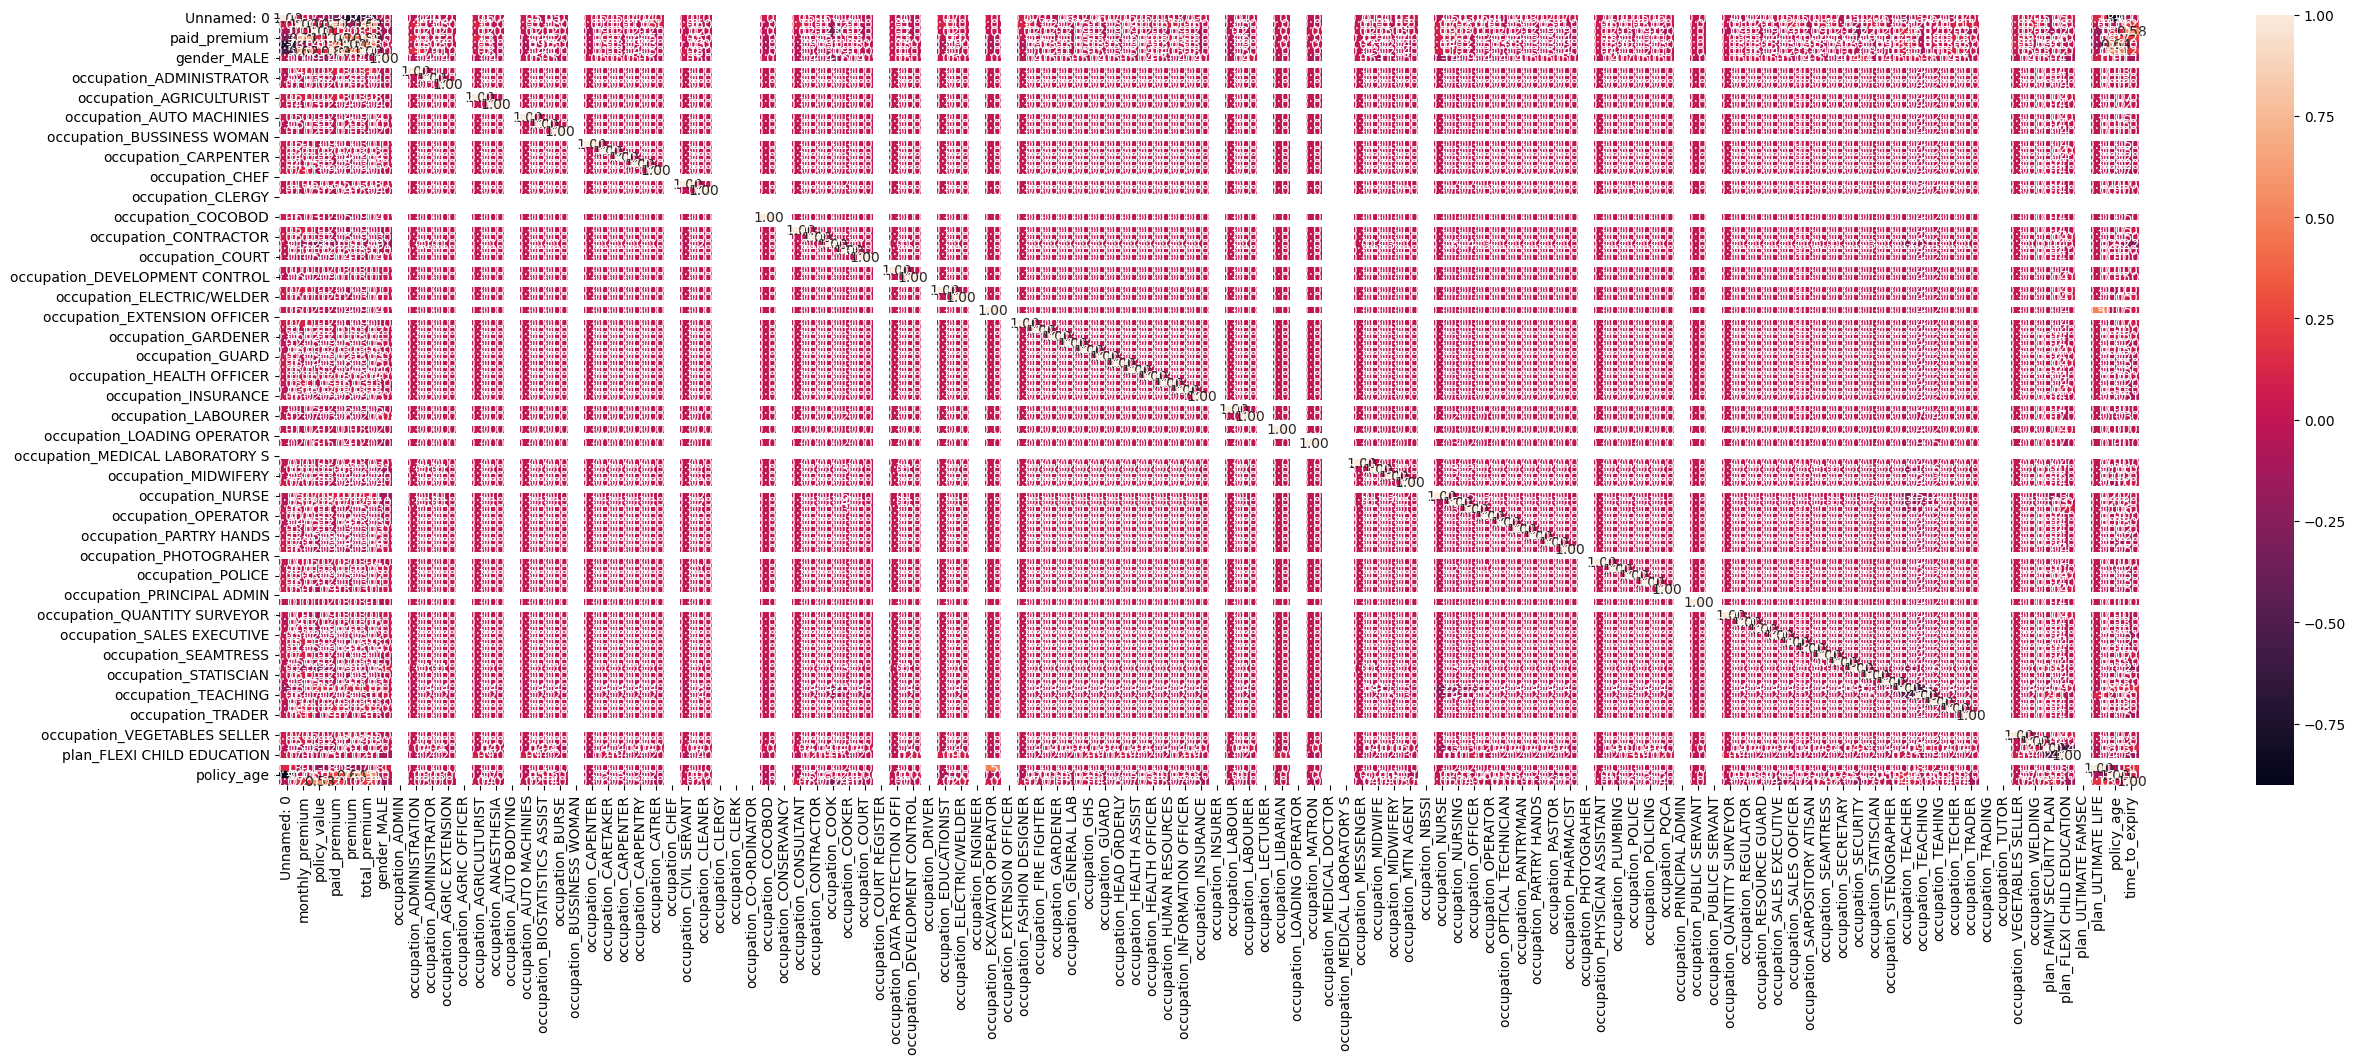

In [32]:
# Feature Selection
# Calculate correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()


In [33]:
# Select features based on correlation with the target variable
correlation_threshold = 0.1
relevant_features = corr_matrix['monthly_premium'][corr_matrix['monthly_premium'].abs() > correlation_threshold].index
df = df[relevant_features]


In [34]:
# 7. Split the dataset into training and testing sets
X = df.drop('monthly_premium', axis=1)
y = df['monthly_premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
print(f'X_train shape: {X_train.shape}\n X_test shape: {X_test.shape}\n y_train shape: {y_train.shape}\n y_test shape: {y_test.shape}')

X_train shape: (440, 19)
 X_test shape: (111, 19)
 y_train shape: (440,)
 y_test shape: (111,)


In [37]:
# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)


In [38]:
# Train models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Predict on test set
y_pred_lr = linear_reg.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)


In [41]:
# Evaluate models
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def evaluate_model(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Old way, now deprecated
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # New way, using numpy's sqrt function
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

# Linear Regression evaluation
rmse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}, R²: {r2_lr}")

# Decision Tree Regressor evaluation
rmse_dt, mae_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
print(f"Decision Tree Regressor - RMSE: {rmse_dt}, MAE: {mae_dt}, R²: {r2_dt}")

# Random Forest Regressor evaluation
rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest Regressor - RMSE: {rmse_rf}, MAE: {mae_rf}, R²: {r2_rf}")




Linear Regression - RMSE: 25.914814639755715, MAE: 11.446895880117122, R²: 0.5323495023013897
Decision Tree Regressor - RMSE: 26.469598403444653, MAE: 9.18018018018018, R²: 0.5121122748969611
Random Forest Regressor - RMSE: 21.41581108175194, MAE: 7.126291291291293, R²: 0.6806299094490952


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression - RMSE: 25.914814639755715, MAE: 11.446895880117122, R²: 0.5323495023013897
Decision Tree Regressor - RMSE: 26.469598403444653, MAE: 9.18018018018018, R²: 0.5121122748969611
Random Forest Regressor - RMSE: 21.41581108175194, MAE: 7.126291291291293, R²: 0.6806299094490952


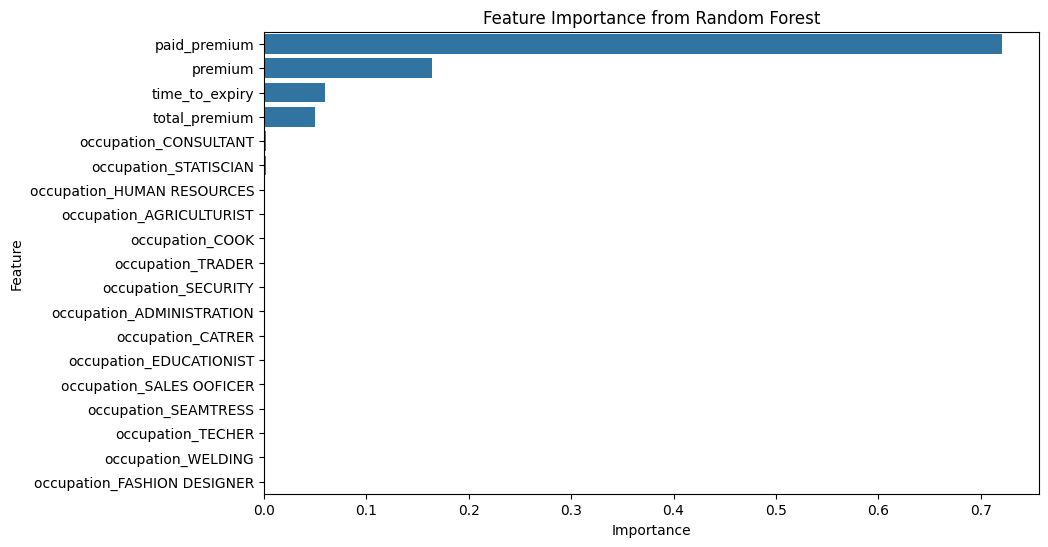

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Evaluate models
def evaluate_model(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Use squared=False to get RMSE directly
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

# Linear Regression evaluation
rmse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}, R²: {r2_lr}")

# Decision Tree Regressor evaluation
rmse_dt, mae_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
print(f"Decision Tree Regressor - RMSE: {rmse_dt}, MAE: {mae_dt}, R²: {r2_dt}")

# Random Forest Regressor evaluation
rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest Regressor - RMSE: {rmse_rf}, MAE: {mae_rf}, R²: {r2_rf}")

# Feature importance from Random Forest
importances = random_forest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Evaluate the tuned Random Forest model
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf, mae_best_rf, r2_best_rf = evaluate_model(y_test, y_pred_best_rf)
print(f"Tuned Random Forest Regressor - RMSE: {rmse_best_rf}, MAE: {mae_best_rf}, R²: {r2_best_rf}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 